In [2]:
# pyplot for plotting
import matplotlib.pyplot as plt
# numpy for vectorized array operations
import numpy as np
# pandas for proper tabular manipulation
import pandas as pd
# scipy stats for our subversions
from scipy import stats

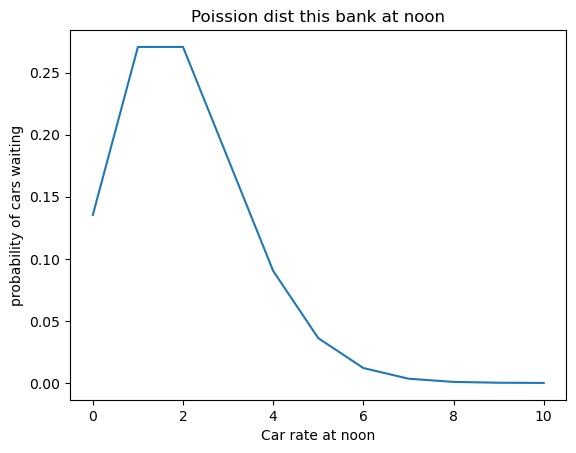

In [3]:
#A bank found that the average number of cars waiting during the noon hour at a drive-up window 
#follows a Poisson distribution with a mean of 2 cars. 
#Make a chart of this distribution and answer these questions concerning the 
#probability of cars waiting at the drive-up window.

bank = stats.poisson(2)
x = np.arange(0,11)
y = [bank.pmf(i) for i in x]
plt.plot(x,y)
plt.xlabel('Car rate at noon')
plt.ylabel('probability of cars waiting')
plt.title('Poission dist this bank at noon')
plt.show()

In [4]:
#What is the probability that no cars drive up in the noon hour?
#because its a discrete i can use pmf
bank.pmf(0)

0.1353352832366127

In [42]:
#cdf pulls the same because theres no values less than zero
bank.cdf(0)

0.1353352832366127

In [43]:
#What is the probability that 3 or more cars come through the drive through?
bank.sf(2)

0.32332358381693654

In [44]:
#How likely is it that the drive through gets at least 1 car?
bank.sf(0)

0.8646647167633873

In [7]:
#Grades of State University graduates are normally distributed with a 
#mean of 3.0 and a standard deviation of .3. Calculate the following:
mean = 3
std = 0.3
grades = stats.norm(mean,std)
#What grade point average is required to be in the top 5% of the graduating class?
#isf because were given a probability
grades.isf(0.05)

3.4934560880854417

In [45]:
#What GPA constitutes the bottom 15% of the class?
grades.ppf(0.15)

2.689069983151863

In [46]:
#An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
#Determine the range of the third decile.
grades.ppf(0.3)

2.842679846187588

In [47]:
grades.ppf((0.2,0.3))

array([2.74751363, 2.84267985])

In [48]:
np.ptp(grades.ppf((0.2,0.3)))

0.0951662162594622

In [51]:
lower_grade = grades.ppf((0.2,0.3))[0]
higher_grade = grades.ppf((0.2,0.3))[1]
lower_grade < 2.8 < higher_grade

True

In [10]:
#Would a student with a 2.8 grade point average qualify for this scholarship?
#yes

In [11]:
#If I have a GPA of 3.5, what percentile am I in?
grades.sf(3.5)

0.0477903522728147

In [52]:
grades.cdf(3.5)

0.9522096477271853

In [56]:
#A marketing website has an average click-through rate of 2%. 
#One day they observe 4326 visitors and 97 click-throughs.
click_rate_avg = 0.02
λ = 4326 *0.02
marketing = stats.poisson(click_rate_avg)

In [13]:
97/4326

0.022422561257512713

In [55]:
click_dist = stats.binom(4326, 0.02)

In [14]:
#How likely is it that this many people or more click through?
marketing.pmf(1-(97/4326))

0.02160158874504463

In [15]:
#You are working on some statistics homework consisting of 100 questions 
#where all of the answers are a probability rounded to the hundreths place. 
#Looking to save time, you put down random probabilities as the answer to each question.
questions = 100
p = .01

statshw = stats.binom(100,0.01)

In [63]:
#What is the probability that at least one of your first 60 answers is correct?
#change trials to 60
statshw = stats.binom(60,0.01)

In [64]:
stats.binom(60,0.01).sf(0)

0.45284335760923855

In [ ]:
#The codeup staff tends to get upset when the student break area is not cleaned up. 
#Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, 
#on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
#How likely is it that the break area gets cleaned up each day? 
#How likely is it that it goes two days without getting cleaned up? All week?

In [ ]:
#what type of distro?
#binomial! number of trials:
#success rate is 0.03
#number of trials is how many times the student enters thebreak room
# num trials = 3chorts * 22 students *0.9

In [65]:
num_trials = 3 * 22 * 0.9
num_trials = round(num_trials)

In [66]:
prob_succes = 0.03

In [67]:
clean_dist = stats.binom(num_trials,prob_succes)

In [68]:
clean_dist.sf(0)

0.8342199288437352

In [69]:
#two days with zero cleaning events
stats.binom(num_trials * 2,prob_succes).pmf(0)

0.027483031992576134

In [70]:
# all week without cleaning
stats.binom(num_trials * 5,prob_succes).pmf(0)

0.00012521651388091245

In [71]:
#You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 
#After several weeks of careful observation, you notice that the average number of people in line 
#when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 
#If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, 
mean=15
std=3
orderlen = 2
wait_time_avg = mean * orderlen
pan = stats.norm(wait_time_avg,std*2)

In [75]:
#what is the likelihood that you have at least 15 minutes left to eat your 
#food before you have to go back to class?
#Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.
pan.sf(15+10)

0.7976716190363569

In [76]:
#60 - 15 -10 -2 = 33
pan.cdf(33)

0.6914624612740131

In [19]:
pan.isf(0.25 + 0.1)

31.155961399222704

In [20]:
#Connect to the employees database and find the average salary of current employees, 
#along with the standard deviation. For the following questions, 
#calculate the answer based on modeling the employees salaries with a 
#normal distribution defined by the calculated mean and standard deviation then compare this answer to the 
#actual values present in the salaries dataset.
import pandas as pd
import env

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'





In [21]:
pd.read_sql('show tables From employees', url)

,Tables_in_employees
0,departments
1,dept_emp
2,dept_manager
3,employees
4,salaries
5,titles


In [23]:
pd.read_sql('SELECT * FROM salaries LIMIT 1',url)

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26


In [77]:
pd.read_sql('SELECT avg(salary) FROM salaries where to_date>now()',url)

,avg(salary)
0,72012.2359


In [78]:
pd.read_sql('SELECT std(salary) FROM salaries where to_date>now()',url)

,std(salary)
0,17309.959336


In [79]:
avg = 72012.24
std = 17309.96
salaries = stats.norm(avg,std)

In [80]:
#What percent of employees earn less than 60,000?
salaries.cdf(60_000)

0.24385690499062396

In [85]:
#What percent of employees earn more than 95,000?
salaries.sf(95000)

0.09208778318255045

In [86]:
#What percent of employees earn between 65,000 and 80,000?
1-(salaries.sf(80000) + salaries.cdf(65000))

0.33506121323503213

In [90]:
salaries.cdf(80000) - salaries.cdf(65000)

0.3350612132350322

In [88]:
salaries.cdf((80000,65000))

array([0.67776374, 0.34270253])

In [89]:
np.ptp(salaries.cdf((80000,65000)))

0.3350612132350322

In [83]:
#What do the top 5% of employees make?
salaries.isf(0.05)

100484.59048838491